## Con UMAP vamos a "reducir" el Dataframe y simplificarlo tratando de perder el mínimo de información. Esta simplificación nos va a permitir graficarlo en 2D y ver las posibles relaciones para la clusterización

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import csv
import pandas.util.testing as tm

import umap
import hdbscan

%matplotlib inline

In [43]:
df= pd.read_csv('../data2/processed/DATAFRAME.csv', index_col = 0)

In [44]:
df.head(1)

,id,vat,total_value,total_quantity,Wristband_value,Wristband_quantity,RFID_value,RFID_quantity,Tickets_value,Tickets_quantity,...,Ribbon_value,Ribbon_quantity,TicketPrinter_value,TicketPrinter_quantity,Printhead_value,Printhead_quantity,Accessories_value,Accessories_quantity,provincia_encoded,cnae_encoded
0,125,A28415495,239.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,199


Eliminamos las columnas de ID y VAT que no son únicamente identificativas

In [45]:
df = df.drop(['id','vat'], axis=1)

Trabamamos con un Dataframe de 9618 filas y 34 columnas

In [46]:
df.shape

(9618, 34)

# Reducimos el Dataframe original siguiendo los parámetros que van por defecto configurados en UMAP

In [54]:
umap_reducer = umap.UMAP()
embedding_basic = umap_reducer.fit_transform(df)

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


Obtenemos un nuevo dataframe con solo 2 columnas

In [55]:
embedding_basic.shape

(9618, 2)

Lo ploteamos

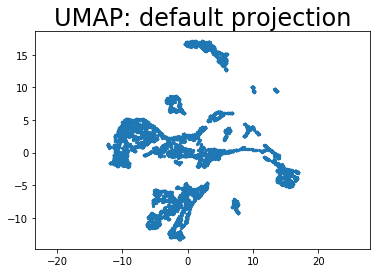

In [68]:
plt.scatter(embedding_basic[:, 0], embedding_basic[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: default projection', fontsize=24);

# Ahora vamos ver como "tunear" los parámetros de UMAP para ver si podemos hacer reducciones 'más clusterizadas'

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


CPU times: user 49.6 s, sys: 240 ms, total: 49.8 s
Wall time: 48.5 s


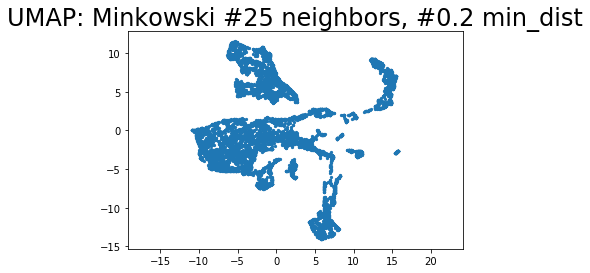

In [69]:
fit_reducer = umap.UMAP(
        n_neighbors=25,
        min_dist=0.2,
        n_components=2,
        metric='minkowski')
%time u_1 = fit_reducer.fit_transform(df)
plt.scatter(u_1[:, 0], u_1[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Minkowski #25 neighbors, #0.2 min_dist', fontsize=24);

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


CPU times: user 1min 44s, sys: 731 ms, total: 1min 45s
Wall time: 1min 43s


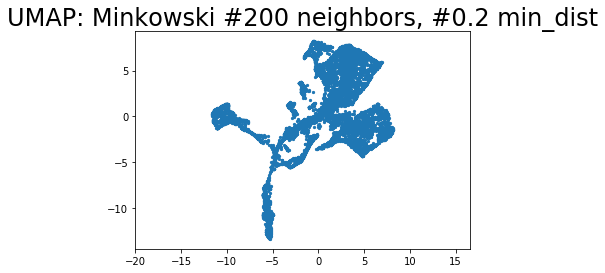

In [70]:
fit = umap.UMAP(
        n_neighbors=200,
        min_dist=0.2,
        n_components=2,
        metric='minkowski')
%time u_2 = fit.fit_transform(df)
plt.scatter(u_2[:, 0], u_2[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Minkowski #200 neighbors, #0.2 min_dist', fontsize=24);   

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


CPU times: user 47.4 s, sys: 575 ms, total: 47.9 s
Wall time: 46.5 s


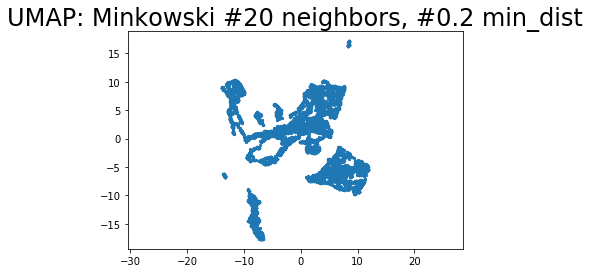

In [71]:
fit = umap.UMAP(
        n_neighbors=20,
        min_dist=0.2,
        n_components=2,
        metric='minkowski')
%time u_3 = fit.fit_transform(df)
plt.scatter(u_3[:, 0], u_3[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Minkowski #20 neighbors, #0.2 min_dist', fontsize=24);   

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


CPU times: user 55.1 s, sys: 316 ms, total: 55.4 s
Wall time: 54.7 s


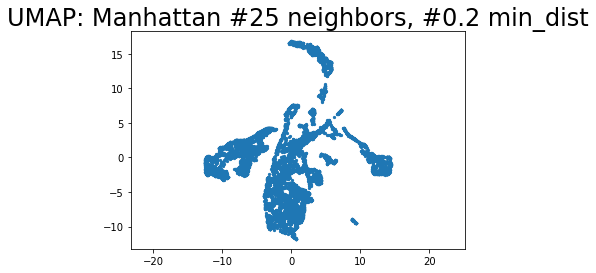

In [72]:
fit = umap.UMAP(
        n_neighbors=25,
        min_dist=0.2,
        n_components=2,
        metric='manhattan')
%time u_4 = fit.fit_transform(df)
plt.scatter(u_4[:, 0], u_4[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Manhattan #25 neighbors, #0.2 min_dist', fontsize=24);   

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


CPU times: user 47.4 s, sys: 679 ms, total: 48.1 s
Wall time: 46.8 s


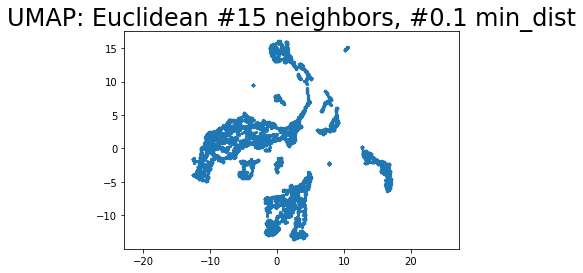

In [73]:
fit = umap.UMAP(
        n_neighbors=15,
        min_dist=0.1,
        n_components=2,
        metric='euclidean')
%time u_5 = fit.fit_transform(df)
plt.scatter(u_5[:, 0], u_5[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Euclidean #15 neighbors, #0.1 min_dist', fontsize=24);   

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


CPU times: user 44.1 s, sys: 236 ms, total: 44.3 s
Wall time: 42.8 s


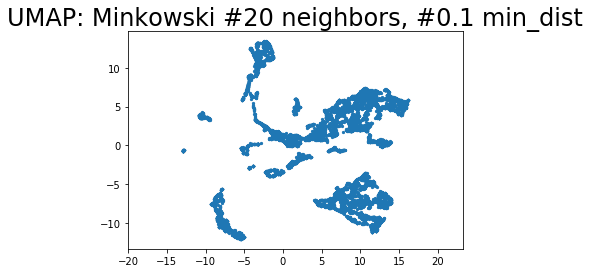

In [77]:
fit = umap.UMAP(
        n_neighbors=20,
        min_dist=0.1,
        n_components=2,
        metric='minkowski')
%time u_6 = fit.fit_transform(df)
plt.scatter(u_6[:, 0], u_6[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Minkowski #20 neighbors, #0.1 min_dist', fontsize=24);   

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


CPU times: user 42.7 s, sys: 268 ms, total: 43 s
Wall time: 41.8 s


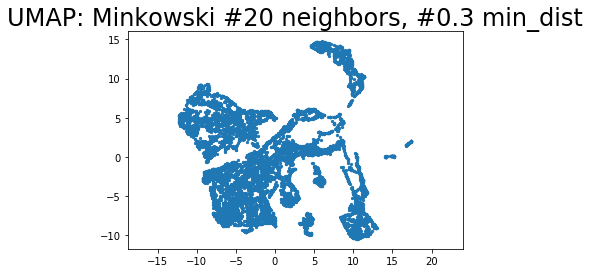

In [78]:
fit = umap.UMAP(
        n_neighbors=20,
        min_dist=0.3,
        n_components=2,
        metric='minkowski')
%time u_7 = fit.fit_transform(df)
plt.scatter(u_7[:, 0], u_7[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Minkowski #20 neighbors, #0.3 min_dist', fontsize=24);   

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


CPU times: user 43.5 s, sys: 160 ms, total: 43.6 s
Wall time: 42.2 s


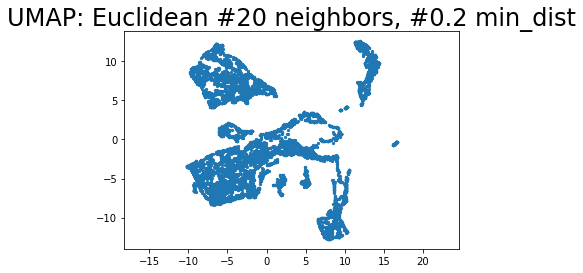

In [79]:
fit = umap.UMAP(
        n_neighbors=20,
        min_dist=0.2,
        n_components=2,
        metric='euclidean')
%time u_8 = fit.fit_transform(df)
plt.scatter(u_8[:, 0], u_8[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Euclidean #20 neighbors, #0.2 min_dist', fontsize=24);   

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 5 separate connected components using meta-embedding (experimental)
  n_components
/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not 

CPU times: user 25.3 s, sys: 227 ms, total: 25.5 s
Wall time: 23.5 s


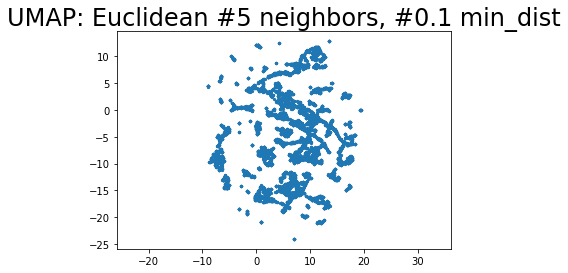

In [80]:
fit = umap.UMAP(
        n_neighbors=5,
        min_dist=0.1,
        n_components=2,
        metric='euclidean')
%time u_9 = fit.fit_transform(df)
plt.scatter(u_9[:, 0], u_9[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Euclidean #5 neighbors, #0.1 min_dist', fontsize=24);   

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


CPU times: user 52.3 s, sys: 478 ms, total: 52.8 s
Wall time: 52 s


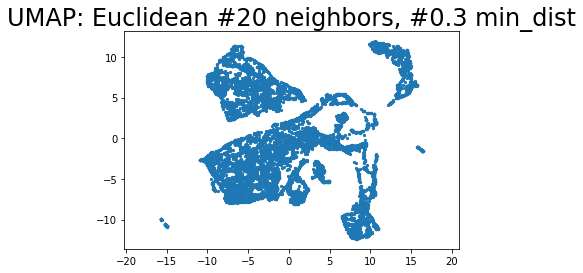

In [81]:
fit = umap.UMAP(
        n_neighbors=20,
        min_dist=0.3,
        n_components=2,
        metric='euclidean')
%time u_10 = fit.fit_transform(df)
plt.scatter(u_10[:, 0], u_10[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Euclidean #20 neighbors, #0.3 min_dist', fontsize=24);  

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


CPU times: user 43.7 s, sys: 686 ms, total: 44.4 s
Wall time: 42.9 s


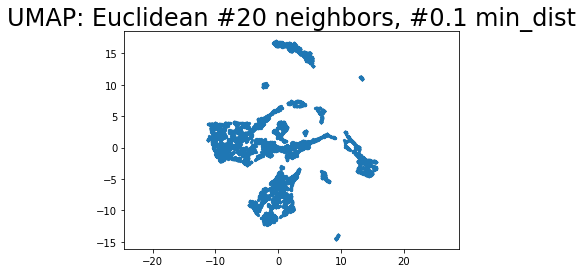

In [82]:
fit = umap.UMAP(
        n_neighbors=20,
        min_dist=0.1,
        n_components=2,
        metric='euclidean')
%time u_11 = fit.fit_transform(df)
plt.scatter(u_11[:, 0], u_11[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Euclidean #20 neighbors, #0.1 min_dist', fontsize=24);  

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


CPU times: user 53.3 s, sys: 212 ms, total: 53.5 s
Wall time: 52.6 s


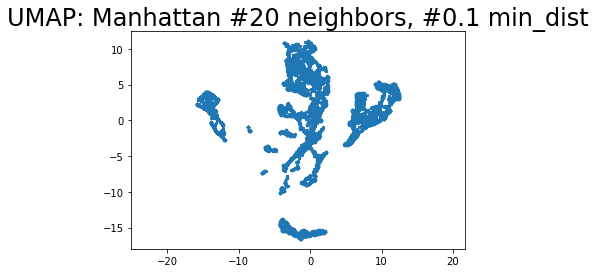

In [86]:
fit = umap.UMAP(
        n_neighbors=20,
        min_dist=0.1,
        n_components=2,
        metric='manhattan',
        random_state=42)
%time u_12 = fit.fit_transform(df)
plt.scatter(u_12[:, 0], u_12[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Manhattan #20 neighbors, #0.1 min_dist', fontsize=24);  

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


CPU times: user 55.4 s, sys: 240 ms, total: 55.6 s
Wall time: 54.6 s


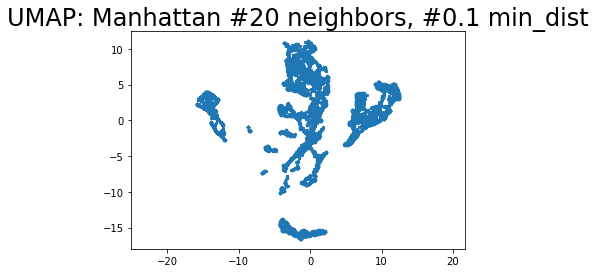

In [87]:
fit = umap.UMAP(
        n_neighbors=20,
        min_dist=0.1,
        n_components=2,
        metric='manhattan',
        random_state=42)
%time u_12 = fit.fit_transform(df)
plt.scatter(u_12[:, 0], u_12[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Manhattan #20 neighbors, #0.1 min_dist', fontsize=24);  

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


CPU times: user 53.8 s, sys: 459 ms, total: 54.3 s
Wall time: 53.4 s


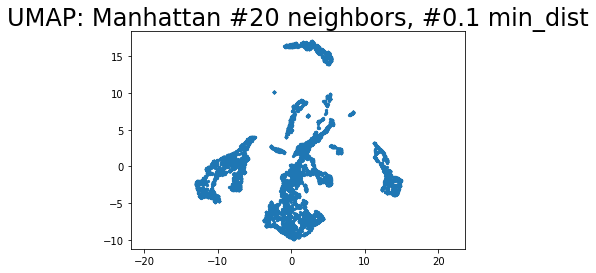

In [88]:
fit = umap.UMAP(
        n_neighbors=20,
        min_dist=0.1,
        n_components=2,
        metric='manhattan',
        random_state=99)
%time u_12 = fit.fit_transform(df)
plt.scatter(u_12[:, 0], u_12[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Manhattan #20 neighbors, #0.1 min_dist', fontsize=24);  